In [16]:
!pwd

/home/vdaza/compact_goups_Nov/plots/void


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)
from collections import Counter
import numpy as np
from itertools import cycle, islice

import numpy as np
np.random.seed(0)

In [2]:
red = pd.read_csv('tipo_de_void/frac_red.csv')
display(red.head(2))
early = pd.read_csv('tipo_de_void/frac_early.csv')
display(early.head(2))

,N,F,L,NE,VS,VR
0,0.00000,0.021739,0.043165,0.058511,0.05,0.0
1,0.06383,0.086957,0.093525,0.164894,0.05,0.0


,N,F,L,NE,VS,VR
0,0.000000,0.000000,0.007194,0.037234,0.05,0.000000
1,0.085106,0.195652,0.050360,0.122340,0.30,0.222222


In [3]:
bines = ['[0 - 0.25)', '[0.25 - 0.5)', '[0.5 - 0.75)', '[0.75 - 1]']

red['bines'] = bines
fracciones_red =  red.reset_index().set_index('bines').drop('index', axis=1)

early['bines'] = bines
fracciones_early =  early.reset_index().set_index('bines').drop('index', axis=1)

In [4]:
display(fracciones_red.head(2))
display(fracciones_early.head(2))

,N,F,L,NE,VS,VR
bines,,,,,,
[0 - 0.25),0.00000,0.021739,0.043165,0.058511,0.05,0.0
[0.25 - 0.5),0.06383,0.086957,0.093525,0.164894,0.05,0.0


,N,F,L,NE,VS,VR
bines,,,,,,
[0 - 0.25),0.000000,0.000000,0.007194,0.037234,0.05,0.000000
[0.25 - 0.5),0.085106,0.195652,0.050360,0.122340,0.30,0.222222


<Figure size 720x648 with 0 Axes>

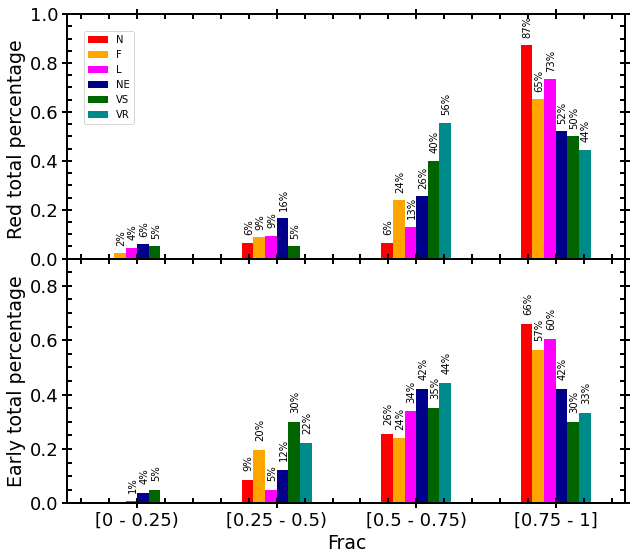

In [19]:
plt.rcParams['figure.figsize'] = 10, 9
plt.figure(figsize=(10, 9))

####subfiguras
f, (ax1, ax2) = plt.subplots(2, sharex='col')                                                        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.0)

# Plots
#my_pal = {"N":"red","F":"Orange", "L":"Magenta", "NE":"blue", "VS":"Darkgreen", "VR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["#FF0000", "#FFA500", "#FF00FF", "#00008B", "#006400", "#008B8B"]



ax1 = fracciones_red.plot(kind='bar', stacked=False, color=color, ax=ax1)
ax2 = fracciones_early.plot(kind='bar', stacked=False, color=color, ax=ax2)


#ax.tick_params(axis='both', which='minor', direction='in')
# Currently, there are no minor ticks,
#   so trying to make them visible would have no effect

#left=None, bottom=None, right=None, top=None
ax1.yaxis.get_ticklocs(minor=True)     # []
ax1.xaxis.get_ticklocs(minor=True)     # []

ax1.tick_params(bottom = True, labelbottom = True, 
               top = True, labeltop = False,
               right = True, labelright = False, 
               left = True, labelleft = True)

ax1.tick_params(bottom=True, top=True, left=True, right=True,
               which='minor', direction='in', 
               length=5, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)

ax1.tick_params(which='major', direction='inout', 
               length=10, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)

# Initialize minor ticks
ax1.minorticks_on()

# Tamaño
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)

# Grosor de los ejes
[i.set_linewidth(2.0) for i in ax1.spines.values()]

#ax.tick_params(axis='both', which='minor', direction='in')
# Currently, there are no minor ticks,
#   so trying to make them visible would have no effect

#left=None, bottom=None, right=None, top=None
ax2.yaxis.get_ticklocs(minor=True)     # []
ax2.xaxis.get_ticklocs(minor=True)     # []

ax2.tick_params(bottom = True, labelbottom = True, 
               top = True, labeltop = False,
               right = True, labelright = False, 
               left = True, labelleft = True)

ax2.tick_params(bottom=True, top=True, left=True, right=True,
               which='minor', direction='in', 
               length=5, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)

ax2.tick_params(which='major', direction='inout', 
               length=10, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)

# Initialize minor ticks
ax2.minorticks_on()

# Tamaño
ax2.xaxis.set_tick_params(labelsize=18, rotation=0)
ax2.yaxis.set_tick_params(labelsize=18)

# Grosor de los ejes
[i.set_linewidth(2.0) for i in ax2.spines.values()]


# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
#ax.xaxis.set_tick_params(which='minor', bottom=True)


for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax1.annotate(f'{height:.0%}', (x + width*0.6, y + height+0.04), ha='center', rotation=90)

for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax2.annotate(f'{height:.0%}', (x + width*0.6, y + height+0.04), ha='center', rotation=90)

ax2.set_xlabel('Frac', fontsize=19)
ax1.set_ylabel('Red total percentage ', fontsize=19)
ax2.set_ylabel('Early total percentage', fontsize=19)
#plt.xticks(rotation=0)
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 0.9)
ax1.legend(loc=[0.03, 0.55])
ax2.get_legend().remove()
plt.savefig('red_early_porcentage.pdf',format='pdf')